### import necessariy modules


In [1]:
import json
import glob
import traceback
from gensim.models import KeyedVectors
from calculate_distance import CalculateDistance
from calculate_bias import calculate_bias_for_all_embedding
from utils import populate_b2e_dict_for_words
from word_sets_male_female import MALE_WORDS_BANGLA, FEMALE_WORDS_BANGLA, PROFESSIONAL_OCCUPATIONS_BANGLA, PROFESSIONAL_OCCUPATIONS_ENGLISH
from plot_utils import get_association_subplot, get_bias_plot, get_correlation_heatmap

### load male, female & professional occupation wordlist

In [2]:
target_groups = [PROFESSIONAL_OCCUPATIONS_BANGLA]
target_group_labels = ['professional_occupation']

reference_groups = [MALE_WORDS_BANGLA, FEMALE_WORDS_BANGLA]
reference_group_labels = ['male', 'female']


b2e_dict = populate_b2e_dict_for_words(PROFESSIONAL_OCCUPATIONS_BANGLA, PROFESSIONAL_OCCUPATIONS_ENGLISH)


In [3]:
calculate_association_distance = CalculateDistance()
calculate_association_distance.set_target_word_groups(target_word_groups=target_groups, target_group_labels=target_group_labels)
calculate_association_distance.set_reference_word_groups(reference_word_groups=reference_groups, reference_group_labels=reference_group_labels)

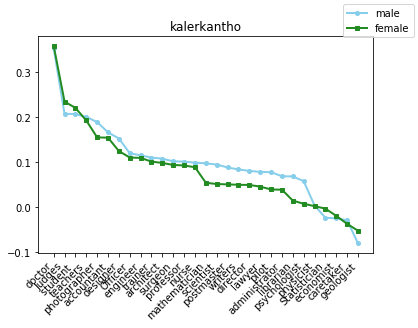

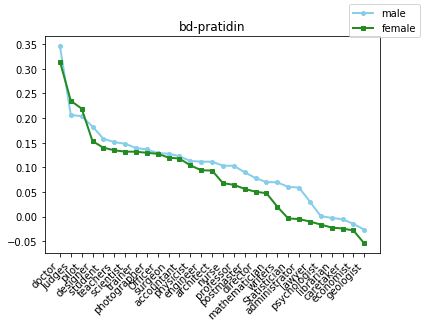

word ইঞ্জিনিয়ার not in embedding 
word ইঞ্জিনিয়ার not in embedding 


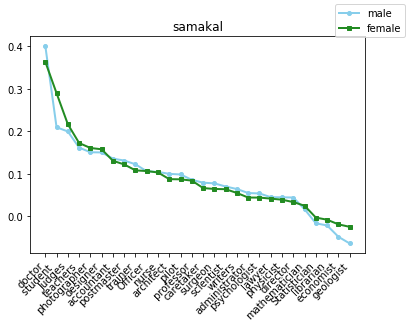

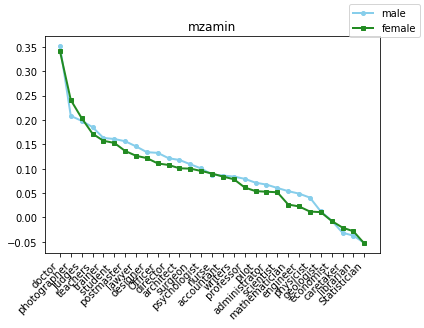

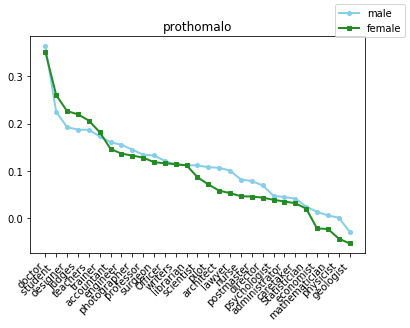

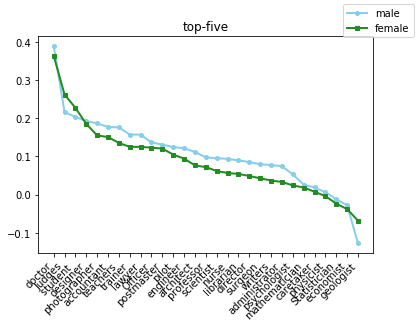

In [4]:
association_dict = {}
model_dir = '../newspaper_biasness_analysis/models/newspaper-wise/txt/'
filenames = glob.glob(model_dir + '*txt')
for filename in filenames:
    newspaper_name = filename.split('/')[-1].split('_')[0]
    target_wise_association_for_this_paper = {}
    model = KeyedVectors.load_word2vec_format(filename, binary=False)
    target_wise_association_for_this_paper = calculate_association_distance.get_association_for_provided_embedding(model=model)
    association_dict[newspaper_name] = target_wise_association_for_this_paper
    
    get_association_subplot(target_wise_association_for_this_paper=target_wise_association_for_this_paper, b2e_dict = b2e_dict, title= newspaper_name)

# print(association_dict)

### Calculate male bias for all embedding

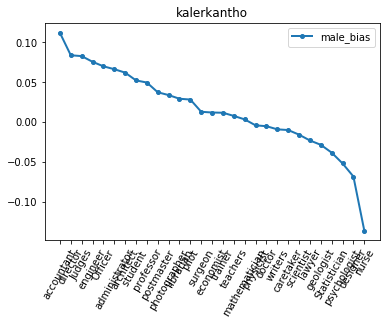

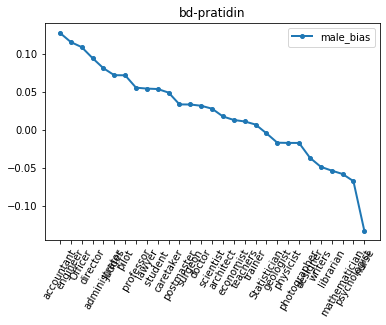

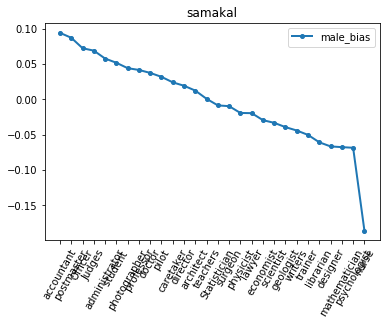

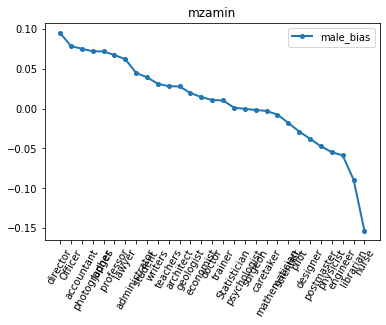

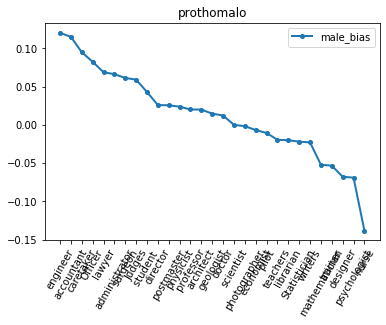

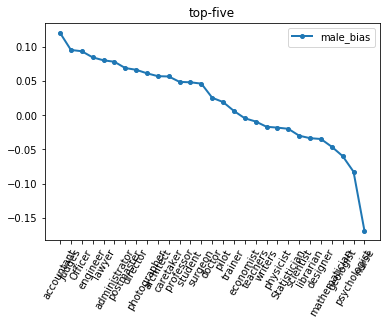

In [5]:

male_bias_dict_for_all_embeddings = calculate_bias_for_all_embedding(association_dict)

get_bias_plot(bias_dict=male_bias_dict_for_all_embeddings, b2e_dict=b2e_dict)

In [6]:

import pandas as pd
df = pd.DataFrame.from_dict(male_bias_dict_for_all_embeddings)

change 


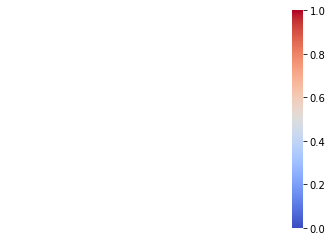

In [16]:
%reload_ext autoreload
%autoreload 2
import plot_utils
import importlib
importlib.reload(plot_utils)
from plot_utils import get_correlation_heatmap
# print(df)
get_correlation_heatmap(df=df)


